## Money Laundering Data Analysis
Notebook author: Philippe Heitzmann

In [7]:
import pandas as pd

file_path = "/data/AML exercise - dataset.xlsx"
df = pd.read_excel(file_path)

In [8]:
df.head()

,Unnamed: 0,Send DateTime,Pay DateTime,Amount,Sender Name_,Sender Address_,Sender ID1 info,Sender City,Sender State,Payee Name_,...,Send Agent State,Send Country,Send Operator Name_,Pay Agent Name_,Pay Agent City,Pay Agent State,Pay Country,Pay Operator Name_,Sender Age,Payee Age
0,0,12/26/2015 13:01,12/28/2015 9:19,990.0,name_1,address_1,1,PALO ALTO,CA,name_742,...,CA,UNITED STATES,operator_name_3,agent_1,MORELIA,NaN,MEXICO,operator_name_0,40.0,NaN
1,1,12/28/2015 15:36,12/28/2015 19:15,690.0,name_2,address_2,0,SAN JOSE,CA,name_3020,...,CA,UNITED STATES,operator_name_12,agent_2,MANZANILLO,NaN,MEXICO,operator_name_0,50.0,NaN
2,2,11/30/2015 20:55,12/1/2015 18:39,990.0,name_3,address_3,1,REDWOOD CITY,CA,name_3021,...,CA,UNITED STATES,operator_name_3,agent_3,YANGA,NaN,MEXICO,operator_name_0,47.0,NaN
3,3,12/8/2015 15:33,12/8/2015 17:37,1000.0,name_4,address_4,1,SAN CARLOS,CA,name_2609,...,CA,UNITED STATES,operator_name_12,agent_4,GUADALAJARA,NaN,MEXICO,operator_name_0,51.0,53.0
4,4,12/10/2015 14:48,12/10/2015 15:48,830.0,name_5,address_5,0,EAST PALO ALTO,CA,name_3022,...,CA,UNITED STATES,operator_name_12,agent_5,SAN SALVADOR,NaN,EL SALVADOR,operator_name_0,49.0,NaN


## Part 1

#### A) Data Exploration

As a warmup, spend some time exploring the dataset. What patterns do you see in the data? Consider factors such as transaction size, transaction frequency, commonly used send and pay agents, send and pay locations, and so on. Visuals and explanations of your findings are encouraged throughout.

Visualizations to show:  

1. Histogram of "Amount" column transaction size → look for clusters below common reporting thresholds of $3k and $10k  
2. Boxplots of txn amounts grouped by sender/reciever age  
3. Barplot of txn counts / amounts by agents  
4. Hist of send and pay datetime columns → see send vs recieve time differences  
5. Boxplot of txn amounts by "Send Country" vs "Pay Country" (two separate boxplots)  
6. Side by side barplots of txn amounts ("Amount" column) by id provided vs not provided  
   - use columns "Payee ID1 info" and "Sender ID1 info" (so two separate barplots)  
7. Scatterplot of "Sender Age" vs "Amount" and "Payee Age" vs "Amount"  
8. Heatmap of txn amounts betwen send and pay states (columns: "Send Agent State" and "Pay Agent State")  

##### Data Cleaning

In [15]:
# ---- Setup & data prep -------------------------------------------------------
import pandas as pd
import numpy as np

# Path from your prompt
PATH = "/data/AML exercise - dataset.xlsx"

# Load dataset
df = pd.read_excel(PATH)

# Ensure key columns are the right dtypes
for col in ["Send DateTime", "Pay DateTime"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Sender Age"] = pd.to_numeric(df["Sender Age"], errors="coerce")
df["Payee Age"] = pd.to_numeric(df["Payee Age"], errors="coerce")

# Simple helpers / engineered fields
df["Send Hour"] = df["Send DateTime"].dt.hour
df["Pay Hour"] = df["Pay DateTime"].dt.hour

# Age bands for clearer groupings
age_bins = [0, 24, 34, 44, 54, 64, np.inf]
age_labels = ["<25","25–34","35–44","45–54","55–64","65+"]

df["Sender Age Band"] = pd.cut(df["Sender Age"], bins=age_bins, labels=age_labels, right=True)
df["Payee Age Band"] = pd.cut(df["Payee Age"], bins=age_bins, labels=age_labels, right=True)

# ID provided flags
def id_provided(series):
    return series.astype(str).str.strip().replace({"nan": ""}).ne("")

df["Sender ID Provided"] = id_provided(df["Sender ID1 info"])
df["Payee ID Provided"]  = id_provided(df["Payee ID1 info"])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Initiated with figsize (12, 7)


##### Data Exploration with Visualizations

In [24]:
del viz
# Instantiate your Viz class with the dataframe
viz = Viz(df=df, figsize=(12, 7))

Initiated with figsize (12, 7)


(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Transaction Amounts (with common thresholds)'}, xlabel='Amount (USD)', ylabel='Count'>)

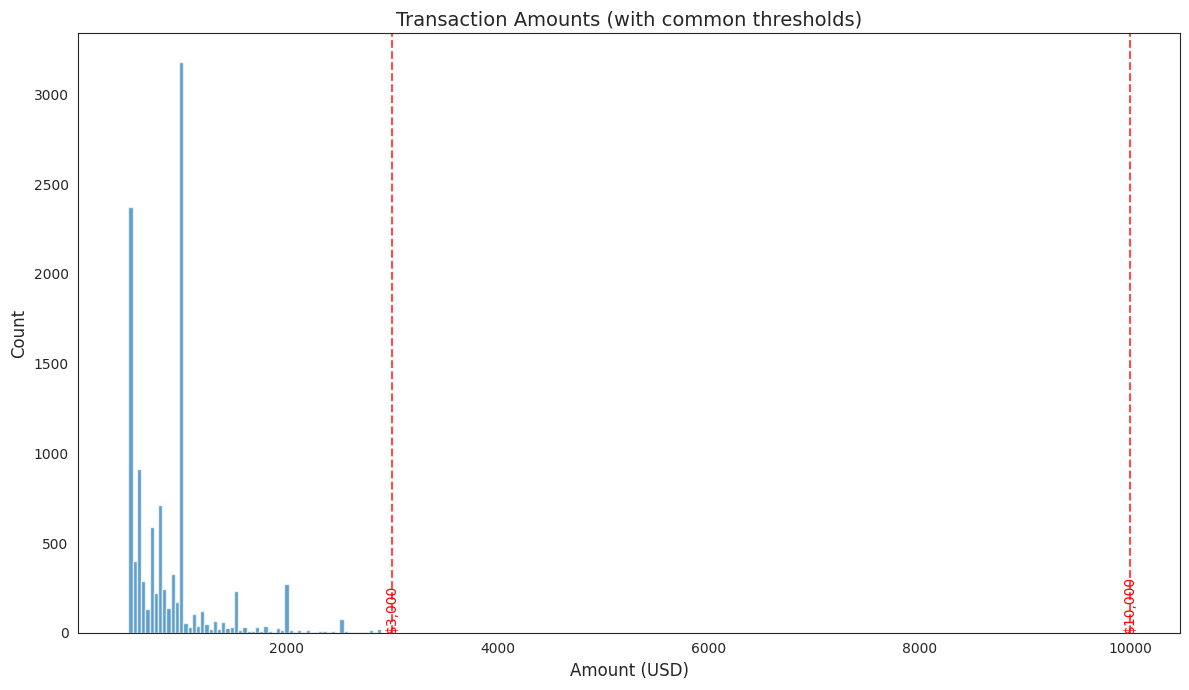

In [25]:
# ---- 1) Histogram of Amount (cluster near $3K and $10K) ----------------------
"""
What this shows:
A distribution of transaction sizes (Amount) with vertical reference lines at
$3,000 and $10,000 to visually inspect any clustering or structuring below
common reporting thresholds.
"""
viz.make_hist(
    "Amount",
    num_bins=60,
    title=("Transaction Amounts (with common thresholds)", 14),
    xlabel=("Amount (USD)", 12),
    ylabel=("Count", 12),
    vlines=[3000, 10000],
)

/tmp/ipykernel_51/3338714858.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_dict = {str(grp[0]):grp[1][y].median() for grp in df.groupby(x)}
/tmp/ipykernel_51/3338714858.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_obs = df.groupby(x)[y].size().values
/tmp/ipykernel_51/3338714858.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_dict = {str(grp[0]):grp[1][y].median() for grp in df.gr

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Amount by Payee Age Band'}, xlabel='Payee Age Band', ylabel='Amount (USD)'>)

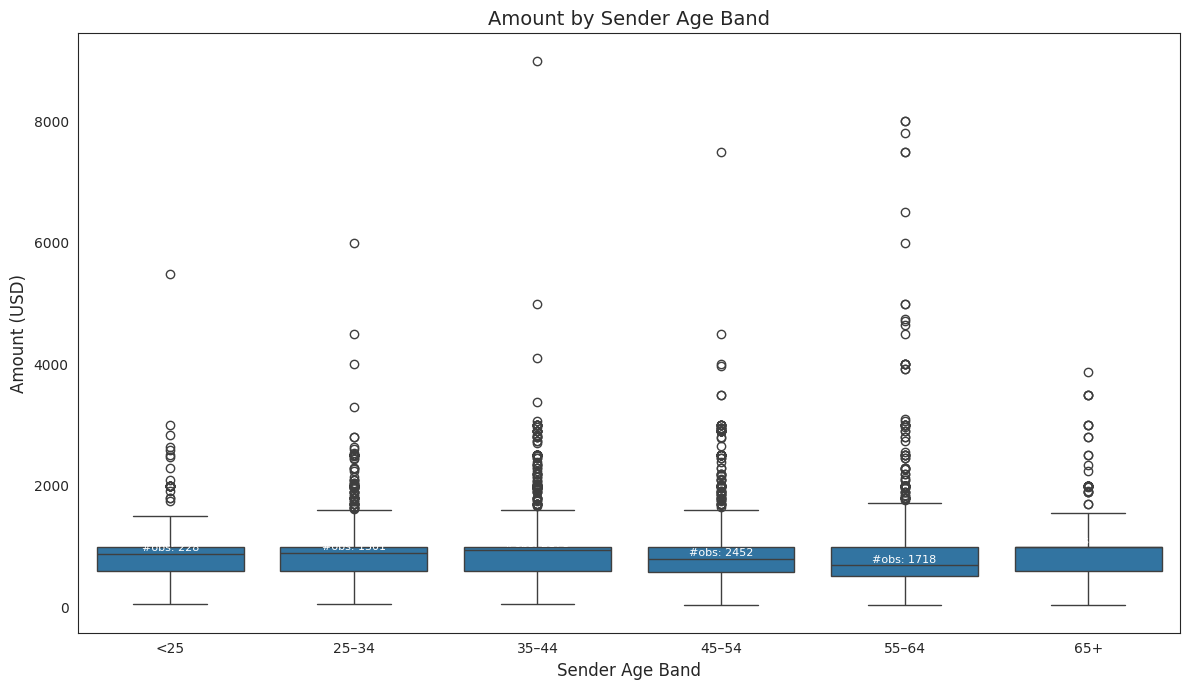

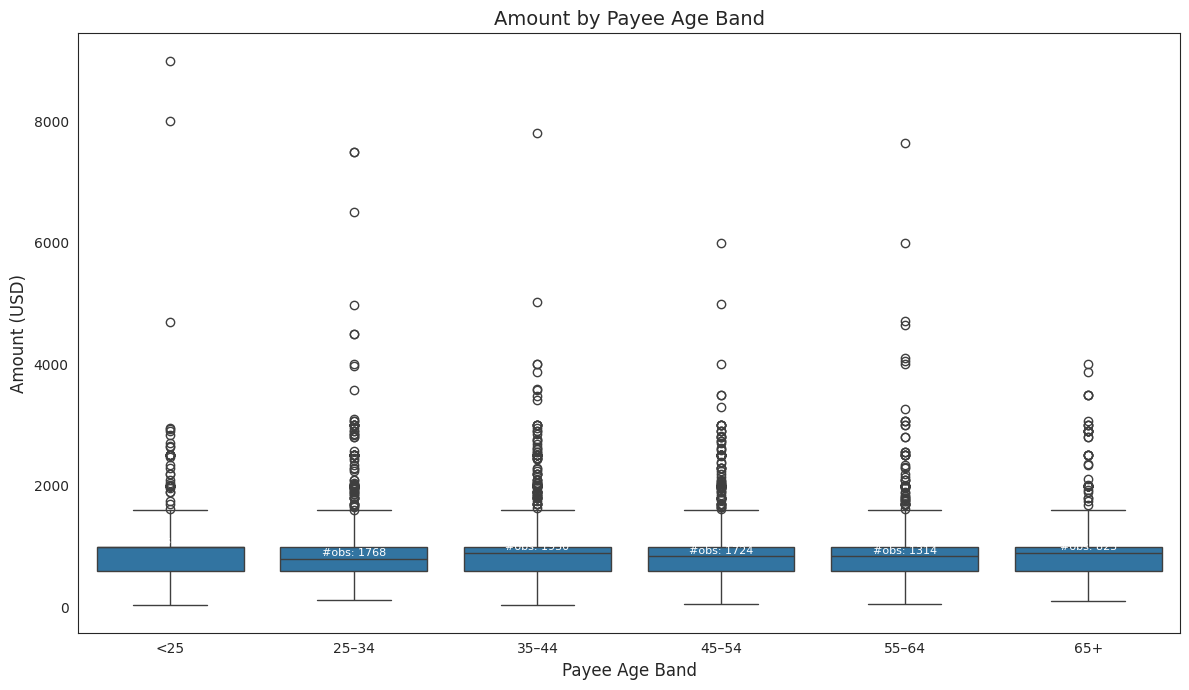

In [27]:
# ---- 2) Boxplots: Amount grouped by sender/receiver age ----------------------
"""
What this shows:
Two separate boxplots of transaction Amount by age bands—first by Sender Age,
then by Payee Age—to spot how distribution (median, spread, outliers) varies
across demographic segments.
"""
viz.make_boxplot(
    x="Sender Age Band",
    y="Amount",
    title=("Amount by Sender Age Band", 14),
    xlabel=("Sender Age Band", 12),
    ylabel=("Amount (USD)", 12),
)

viz.make_boxplot(
    x="Payee Age Band",
    y="Amount",
    title=("Amount by Payee Age Band", 14),
    xlabel=("Payee Age Band", 12),
    ylabel=("Amount (USD)", 12),
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Send Agents by Transaction Count'}, xlabel='Send Agent', ylabel='Count'>)

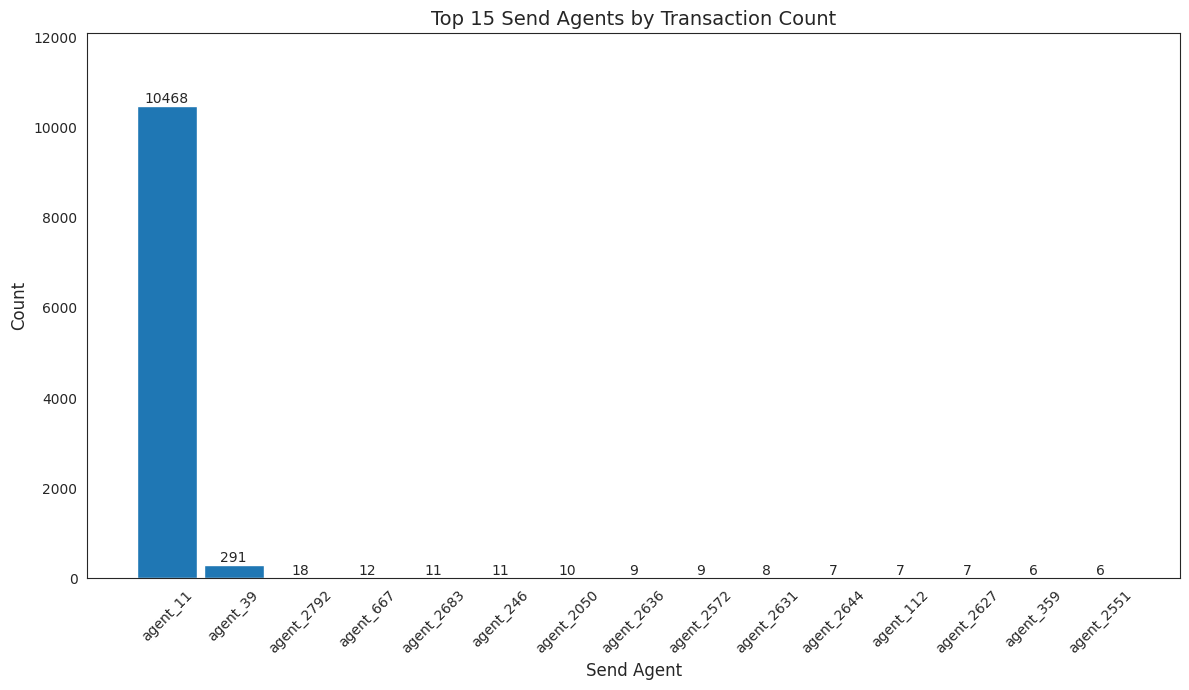

In [28]:
# ---- 3) Barplots: transaction counts / amounts by agents ---------------------
"""
What this shows:
Barplots ranking agents by activity. First by COUNT of transactions, then by
TOTAL Amount. Separate views for Send Agents and Pay Agents (top 15 in each),
useful to identify dominant outlets/partners by volume and value.
"""

# Top Send Agents by count
send_counts = (
    df["Send Agent Name_"].value_counts()
      .head(15)
      .rename_axis("Send Agent")
      .reset_index(name="Txn Count")
)
viz.make_barplot(
    x="Send Agent",
    height="Txn Count",
    df=send_counts,
    rotation=45,
    title=("Top 15 Send Agents by Transaction Count", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Count", 12),
    annots=True,
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Send Agents by Total Amount'}, xlabel='Send Agent', ylabel='Total Amount (USD)'>)

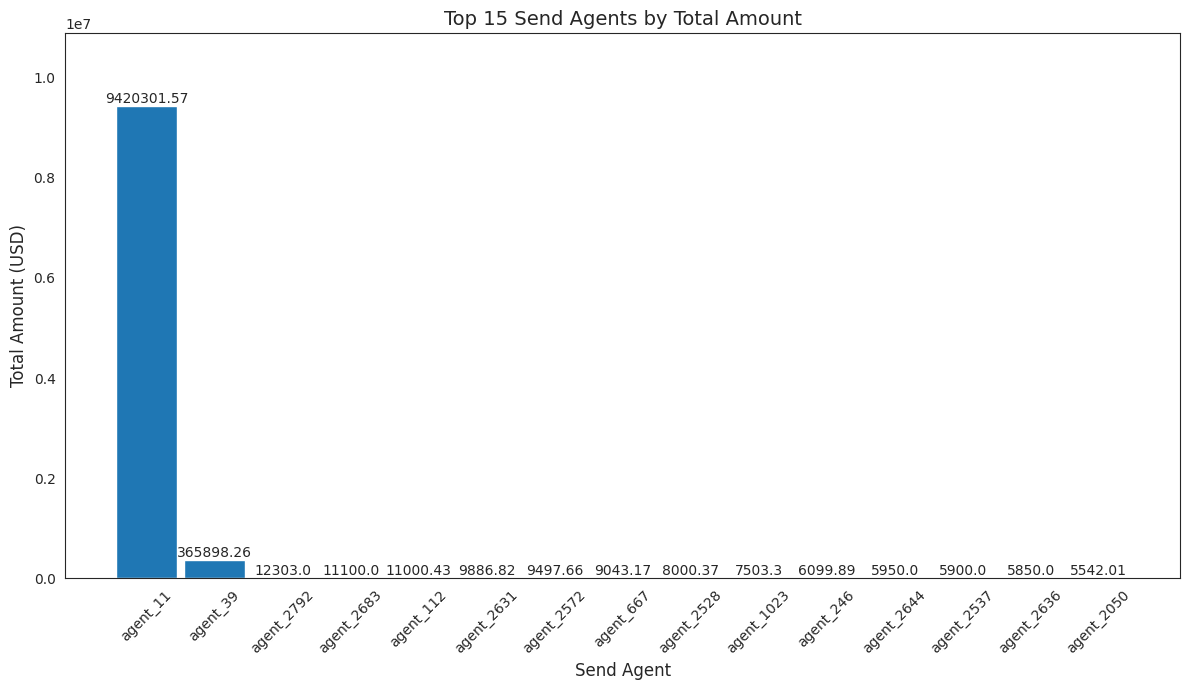

In [29]:
# Top Send Agents by total amount
send_amounts = (
    df.groupby("Send Agent Name_")["Amount"].sum()
      .sort_values(ascending=False)
      .head(15)
      .rename_axis("Send Agent")
      .reset_index(name="Total Amount")
)
viz.make_barplot(
    x="Send Agent",
    height="Total Amount",
    df=send_amounts,
    rotation=45,
    title=("Top 15 Send Agents by Total Amount", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Total Amount (USD)", 12),
    annots=True,
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Pay Agents by Transaction Count'}, xlabel='Pay Agent', ylabel='Count'>)

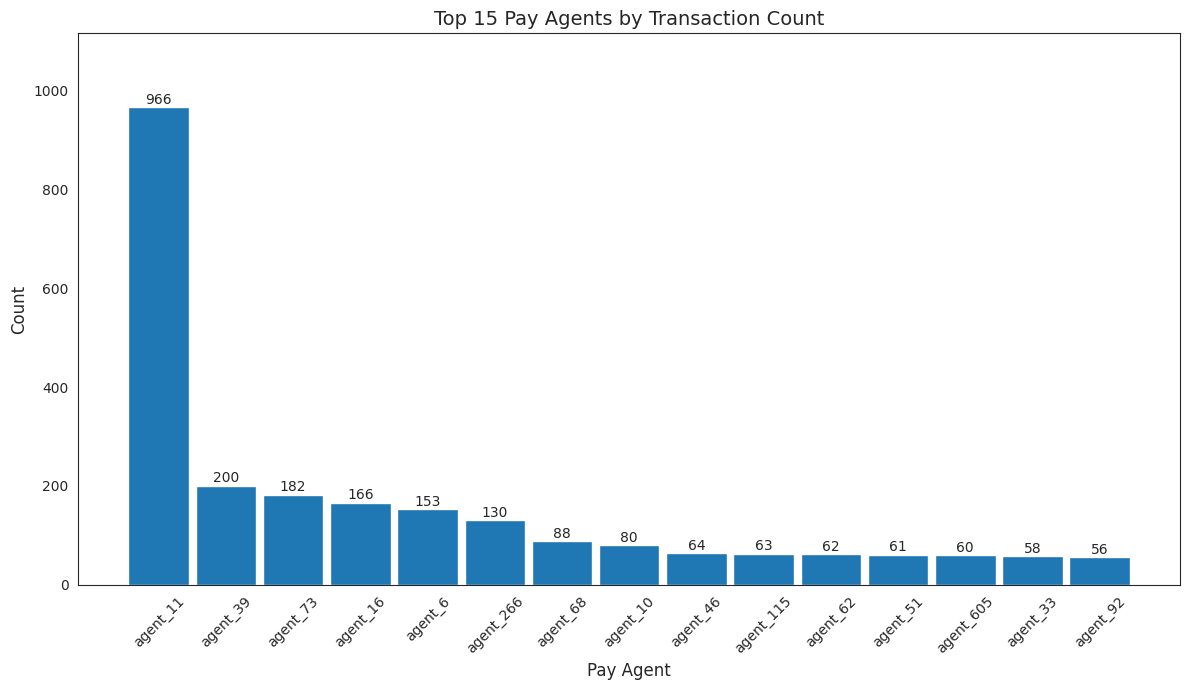

In [30]:
# Top Pay Agents by count
pay_counts = (
    df["Pay Agent Name_"].value_counts()
      .head(15)
      .rename_axis("Pay Agent")
      .reset_index(name="Txn Count")
)
viz.make_barplot(
    x="Pay Agent",
    height="Txn Count",
    df=pay_counts,
    rotation=45,
    title=("Top 15 Pay Agents by Transaction Count", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Count", 12),
    annots=True,
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Pay Agents by Total Amount'}, xlabel='Pay Agent', ylabel='Total Amount (USD)'>)

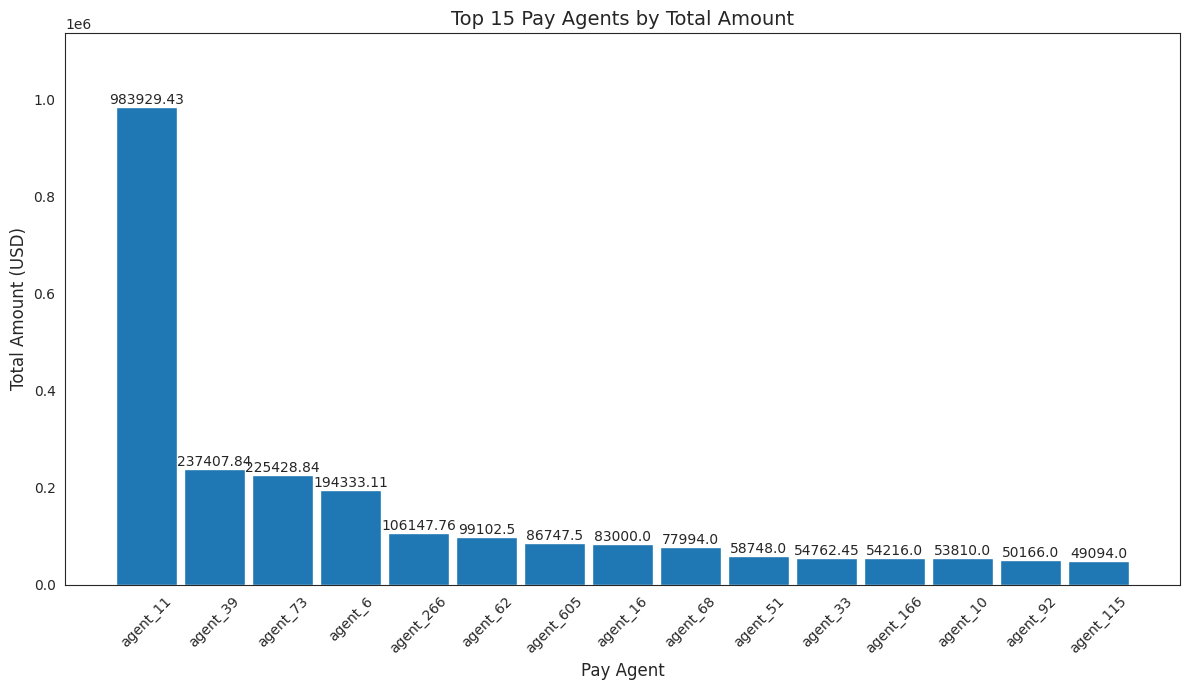

In [31]:
# Top Pay Agents by total amount
pay_amounts = (
    df.groupby("Pay Agent Name_")["Amount"].sum()
      .sort_values(ascending=False)
      .head(15)
      .rename_axis("Pay Agent")
      .reset_index(name="Total Amount")
)
viz.make_barplot(
    x="Pay Agent",
    height="Total Amount",
    df=pay_amounts,
    rotation=45,
    title=("Top 15 Pay Agents by Total Amount", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Total Amount (USD)", 12),
    annots=True,
)


(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Send vs Pay Activity by Hour of Day'}, xlabel='Hour of Day (local)', ylabel='Count'>)

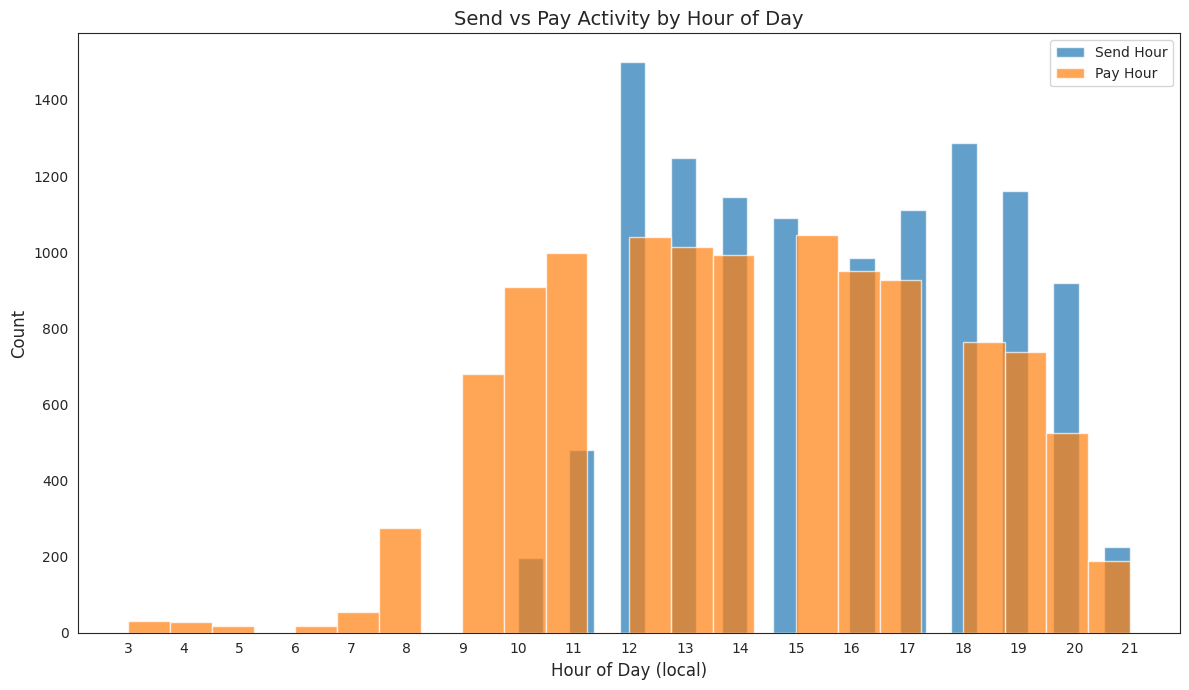

In [32]:
# ---- 4) Hist of Send vs Pay DateTime (hour-of-day) ---------------------------
"""
What this shows:
Two overlaid histograms of transaction activity by hour-of-day for the Send
and Pay timestamps (0–23). This highlights operational timing differences
between initiation and payout.
"""
viz.make_hist(
    "Send Hour",
    "Pay Hour",
    num_bins=24,
    title=("Send vs Pay Activity by Hour of Day", 14),
    xlabel=("Hour of Day (local)", 12),
    ylabel=("Count", 12),
    xticklocs=list(range(0, 24, 1)),
)



(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Amount by Pay Country (Top 15 by count)'}, xlabel='Pay Country', ylabel='Amount (USD)'>)

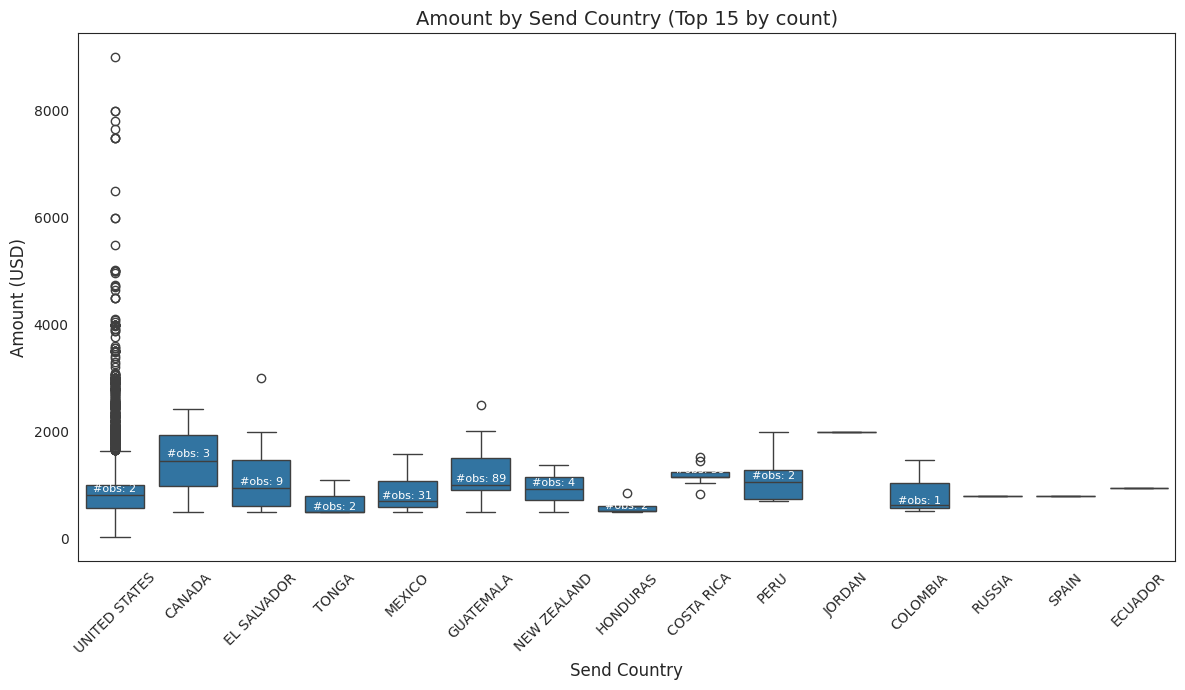

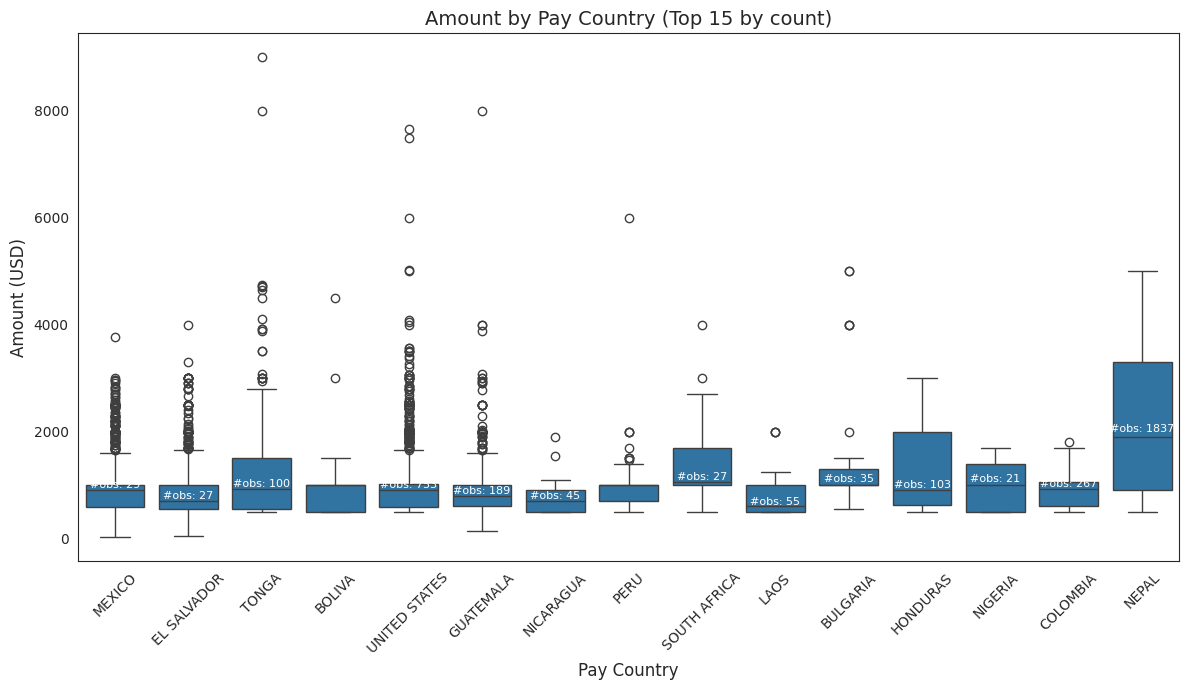

In [33]:
# ---- 5) Boxplots: Amount by Send Country and by Pay Country ------------------
"""
What this shows:
Two separate boxplots of Amount by Send Country and by Pay Country (each using
the top 15 countries by transaction count) to reveal country-level distribution
differences (medians, variability, outliers).
"""
top_send_countries = (
    df["Send Country"].value_counts().head(15).index
)
viz.make_boxplot(
    x="Send Country",
    y="Amount",
    df=df[df["Send Country"].isin(top_send_countries)],
    rotation=45,
    title=("Amount by Send Country (Top 15 by count)", 14),
    xlabel=("Send Country", 12),
    ylabel=("Amount (USD)", 12),
)

top_pay_countries = (
    df["Pay Country"].value_counts().head(15).index
)
viz.make_boxplot(
    x="Pay Country",
    y="Amount",
    df=df[df["Pay Country"].isin(top_pay_countries)],
    rotation=45,
    title=("Amount by Pay Country (Top 15 by count)", 14),
    xlabel=("Pay Country", 12),
    ylabel=("Amount (USD)", 12),
)

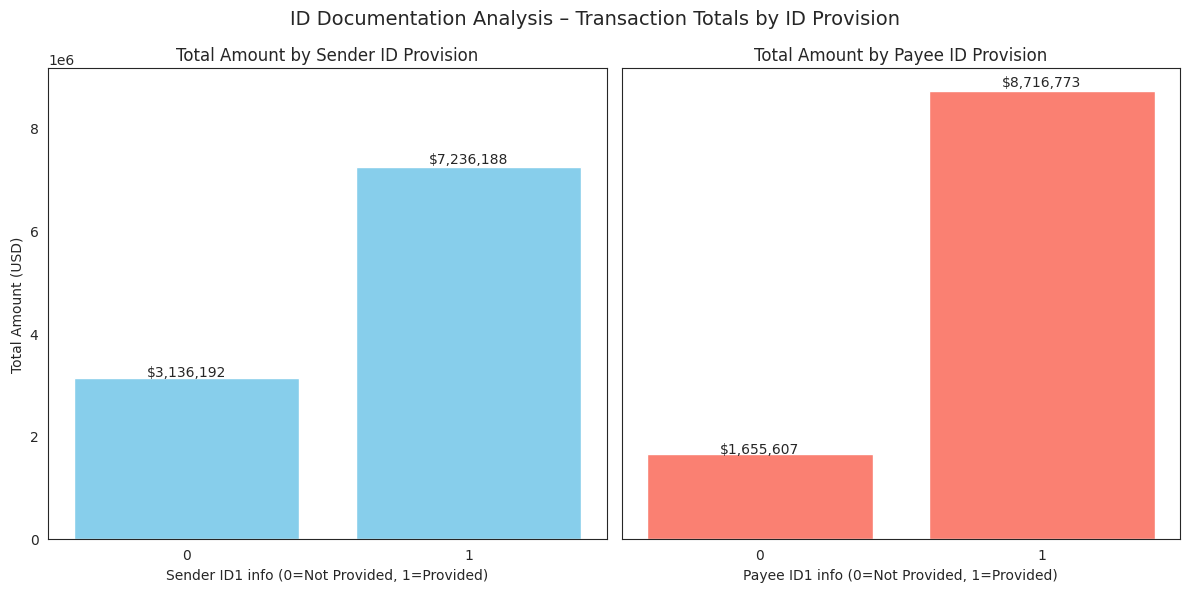

In [38]:
import matplotlib.pyplot as plt

# Aggregate total transaction Amount by ID flag (0 = not provided, 1 = provided)
sender_id_totals = df.groupby("Sender ID1 info")["Amount"].sum()
payee_id_totals  = df.groupby("Payee ID1 info")["Amount"].sum()

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# ---- Sender ID barplot ----
axes[0].bar(sender_id_totals.index.astype(str), sender_id_totals.values, color="skyblue")
axes[0].set_title("Total Amount by Sender ID Provision")
axes[0].set_xlabel("Sender ID1 info (0=Not Provided, 1=Provided)")
axes[0].set_ylabel("Total Amount (USD)")
for i, v in enumerate(sender_id_totals.values):
    axes[0].text(i, v + (0.01 * v), f"${v:,.0f}", ha="center", fontsize=10)

# ---- Payee ID barplot ----
axes[1].bar(payee_id_totals.index.astype(str), payee_id_totals.values, color="salmon")
axes[1].set_title("Total Amount by Payee ID Provision")
axes[1].set_xlabel("Payee ID1 info (0=Not Provided, 1=Provided)")
for i, v in enumerate(payee_id_totals.values):
    axes[1].text(i, v + (0.01 * v), f"${v:,.0f}", ha="center", fontsize=10)

plt.suptitle("ID Documentation Analysis – Transaction Totals by ID Provision", fontsize=14)
plt.tight_layout()
plt.show()


(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Payee Age vs Amount'}, xlabel='Payee Age', ylabel='Amount (USD)'>)

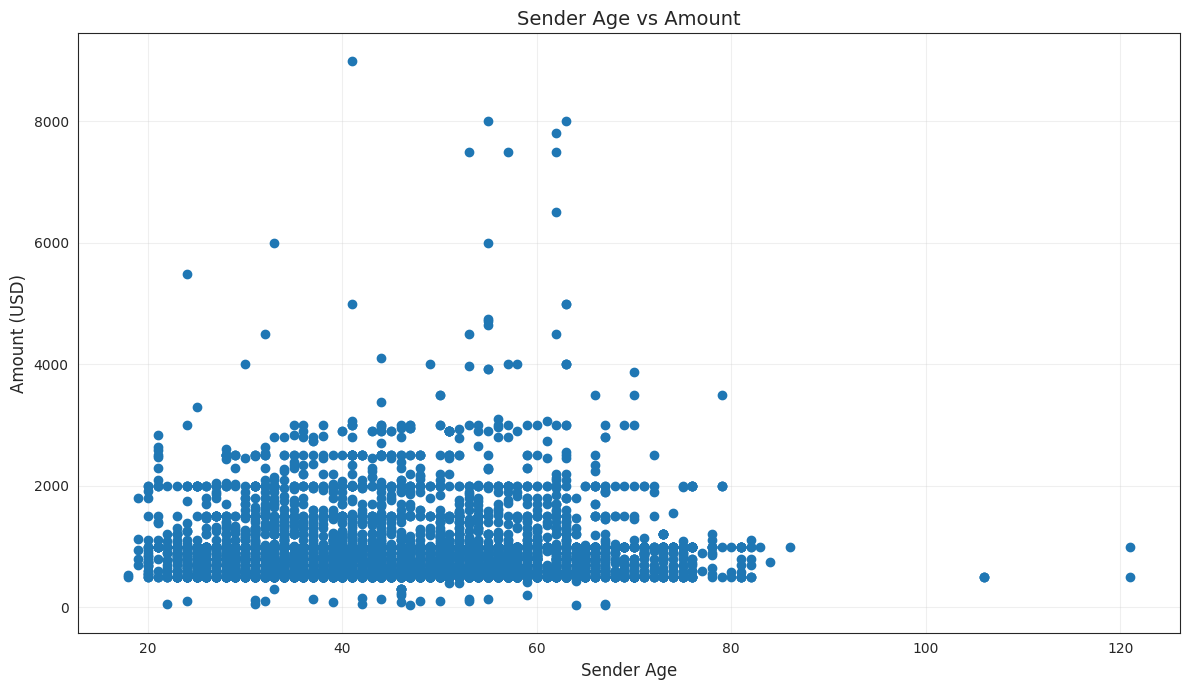

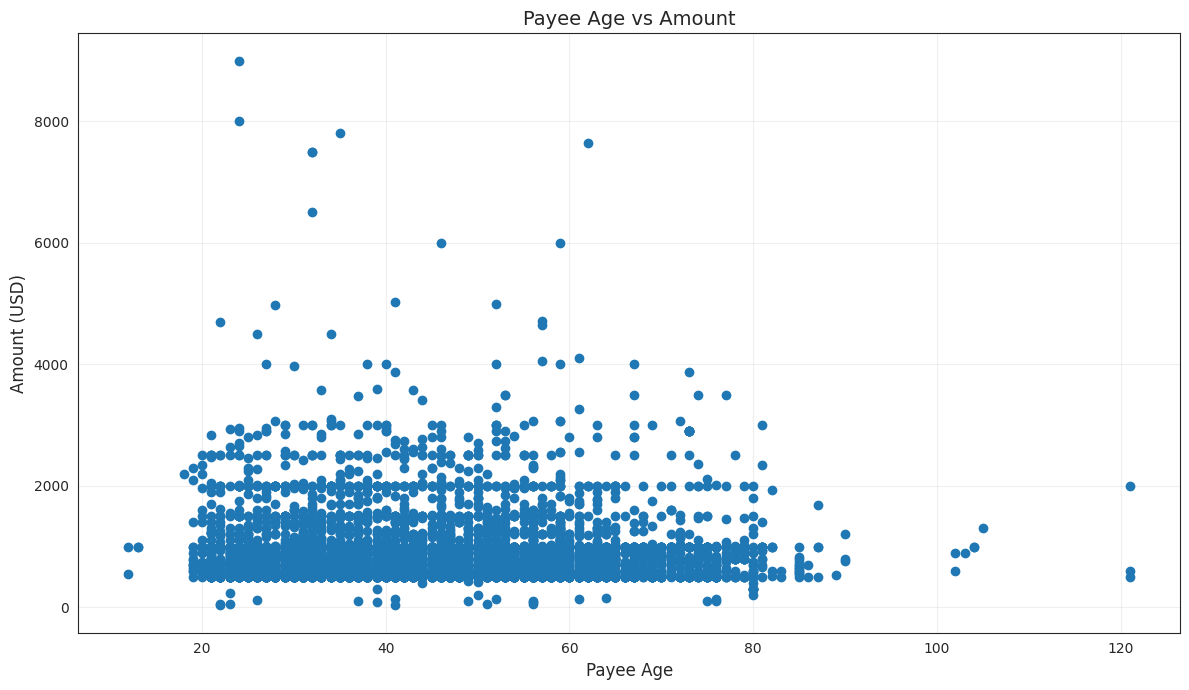

In [39]:

# ---- 7) Scatterplots: Age vs Amount (Sender and Payee) -----------------------
"""
What this shows:
Two scatterplots mapping Age to Amount—one for Sender, one for Payee—to spot
nonlinearities, caps, or clusters (e.g., frequent small sends from younger
senders vs occasional large sends from older segments).
"""
viz.make_scatter(
    "Sender Age", "Amount",
    title=("Sender Age vs Amount", 14),
    xlabel=("Sender Age", 12),
    ylabel=("Amount (USD)", 12),
)

viz.make_scatter(
    "Payee Age", "Amount",
    title=("Payee Age vs Amount", 14),
    xlabel=("Payee Age", 12),
    ylabel=("Amount (USD)", 12),
)

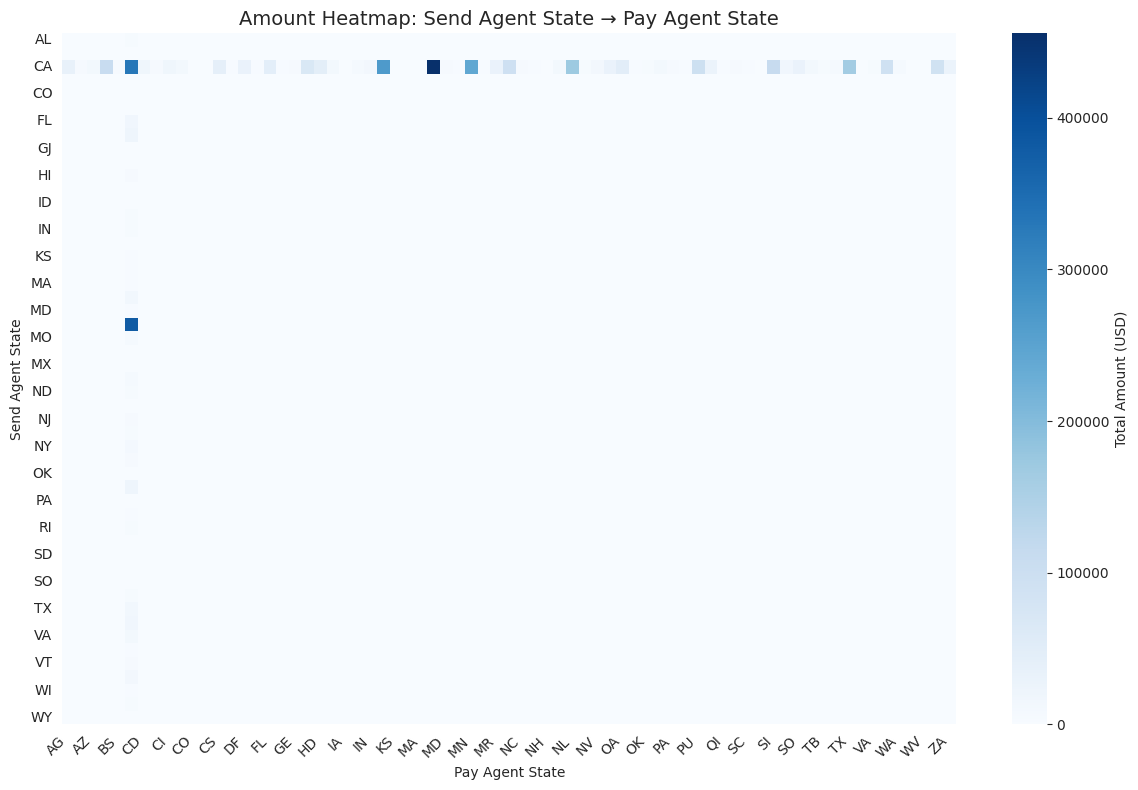

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot to create matrix of Send Agent State (rows) vs Pay Agent State (columns)
state_matrix = (
    df.pivot_table(
        index="Send Agent State",
        columns="Pay Agent State",
        values="Amount",
        aggfunc="sum",
        fill_value=0.0,
    )
    .sort_index()
    .sort_index(axis=1)
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    state_matrix,
    cmap="Blues",
    annot=False,       # set to True if you want actual numbers shown
    fmt=".0f",
    cbar_kws={"label": "Total Amount (USD)"}
)

plt.title("Amount Heatmap: Send Agent State → Pay Agent State", fontsize=14)
plt.xlabel("Pay Agent State")
plt.ylabel("Send Agent State")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### B) Hypotheses based on Exploration

List out some hypotheses as to what indicates a suspicious transaction. Feel free to use external sources, such as FINCEN to guide you. Make sure to explain why your hypotheses might indicate suspicious behavior.

For example, a short time between the wiring and receiving of a transaction may be suspicious because the quick reception of a transfer means that the receiver was informed that the transaction would be coming through (these transactions are being wired and received in person).

## Part 2

#### A) Hypothesis Testing

1. Test the hypotheses. What interesting or suspicious patterns can you find? Share any supporting analysis and visualizations. In your analysis, be sure to test:
    1. Transaction amount/size,
    2. Transaction frequency, 
    3. Short time between wiring and receiving, 
    4. Any other hypotheses you found compelling.

FINCEN knowledge context:

- \$10K Threshold: Any business or financial institution must file a Currency Transaction Report (CTR) with FinCEN for cash transactions exceeding \$10,000 in a single day, whether from one transaction or several aggregated transactions that surpass the threshold.

- \$3K Threshold: Financial institutions and Money Services Businesses (MSBs) are required to keep detailed records for any funds transfer, payment, or purchase of monetary instruments (like bank checks, cashier's checks, money orders, or traveler's checks) made in cash between \$3,000 and \$10,000

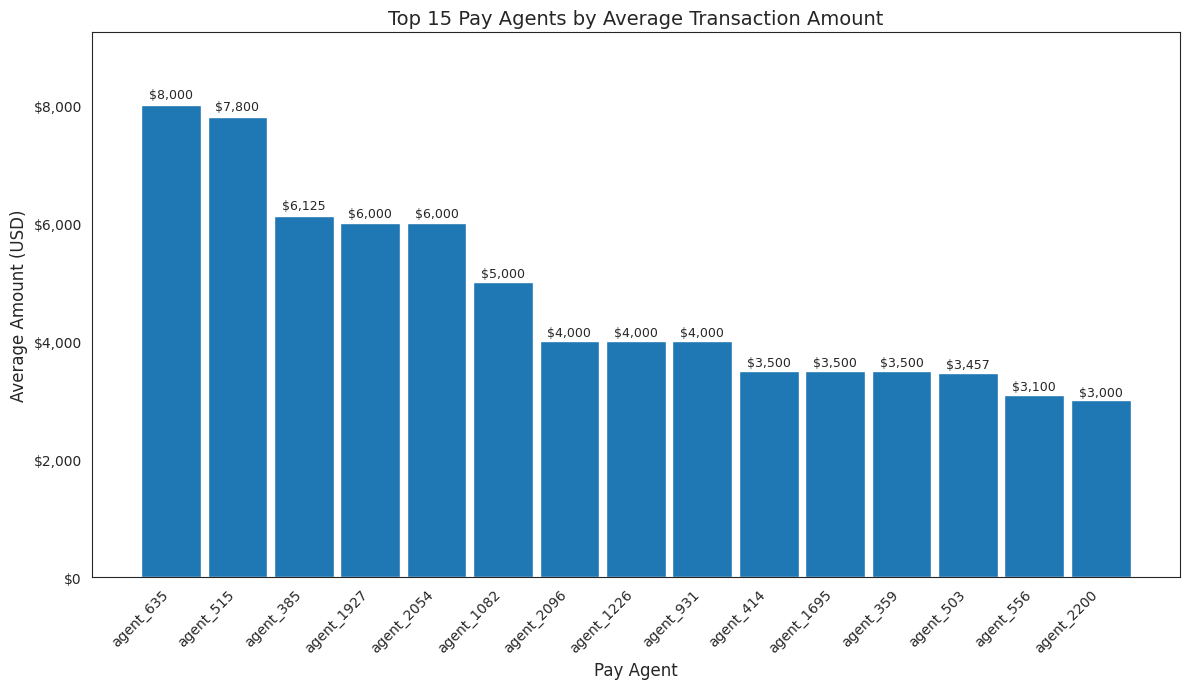

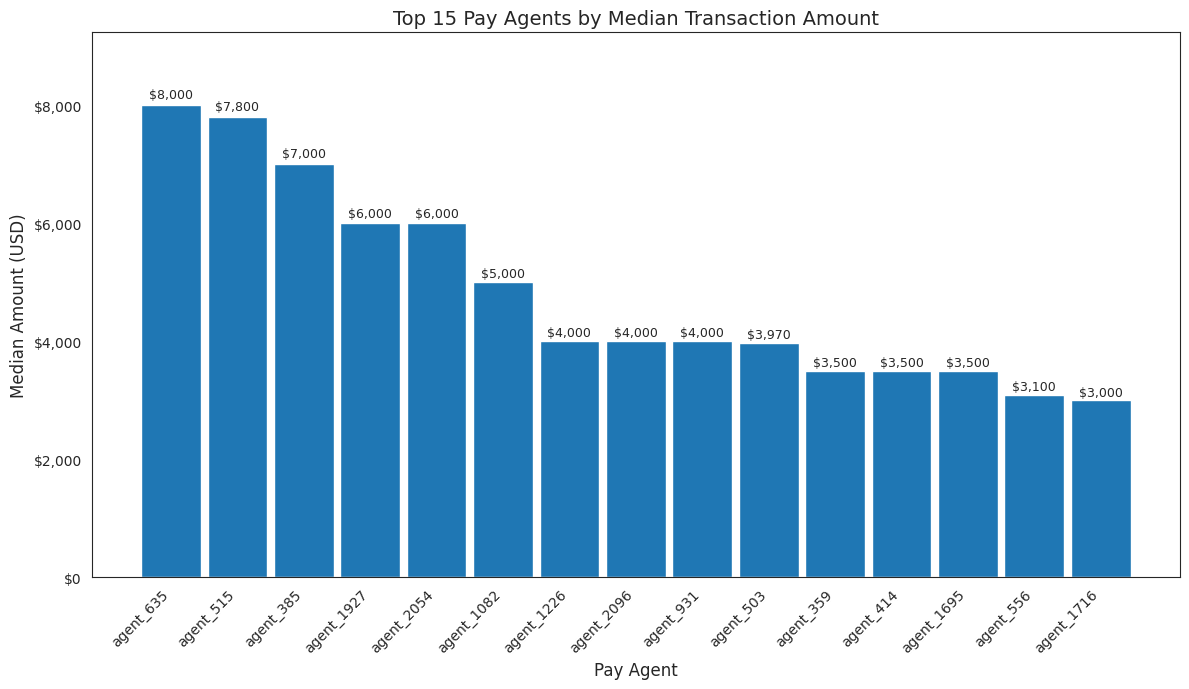

In [43]:
import pandas as pd
from matplotlib.ticker import FuncFormatter

# --- Aggregate average & median by Pay Agent ---
pay_stats = df.groupby("Pay Agent Name_")["Amount"].agg(mean="mean", median="median")

# Top 15 by average
top_avg = (pay_stats
           .sort_values("mean", ascending=False)
           .head(15)
           .reset_index()
           .rename(columns={"Pay Agent Name_": "Pay Agent", "mean": "Average Amount"}))

# Top 15 by median
top_med = (pay_stats
           .sort_values("median", ascending=False)
           .head(15)
           .reset_index()
           .rename(columns={"Pay Agent Name_": "Pay Agent", "median": "Median Amount"}))

# Dollar formatter for y-axis
dollar_fmt = FuncFormatter(lambda x, pos: f'${x:,.0f}')

# ---------- Plot: Top 15 by AVERAGE ----------
fig, ax = viz.make_barplot(
    x="Pay Agent",
    height="Average Amount",
    df=top_avg,
    rotation=45,                         # rotate ticks
    title=("Top 15 Pay Agents by Average Transaction Amount", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Average Amount (USD)", 12),
    annots=False                         # we'll add our own labels
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():       # fix alignment (avoid tick_params ha=...)
    tick.set_ha('right')

# add dollar labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()

# ---------- Plot: Top 15 by MEDIAN ----------
fig, ax = viz.make_barplot(
    x="Pay Agent",
    height="Median Amount",
    df=top_med,
    rotation=45,
    title=("Top 15 Pay Agents by Median Transaction Amount", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Median Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha('right')

for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()


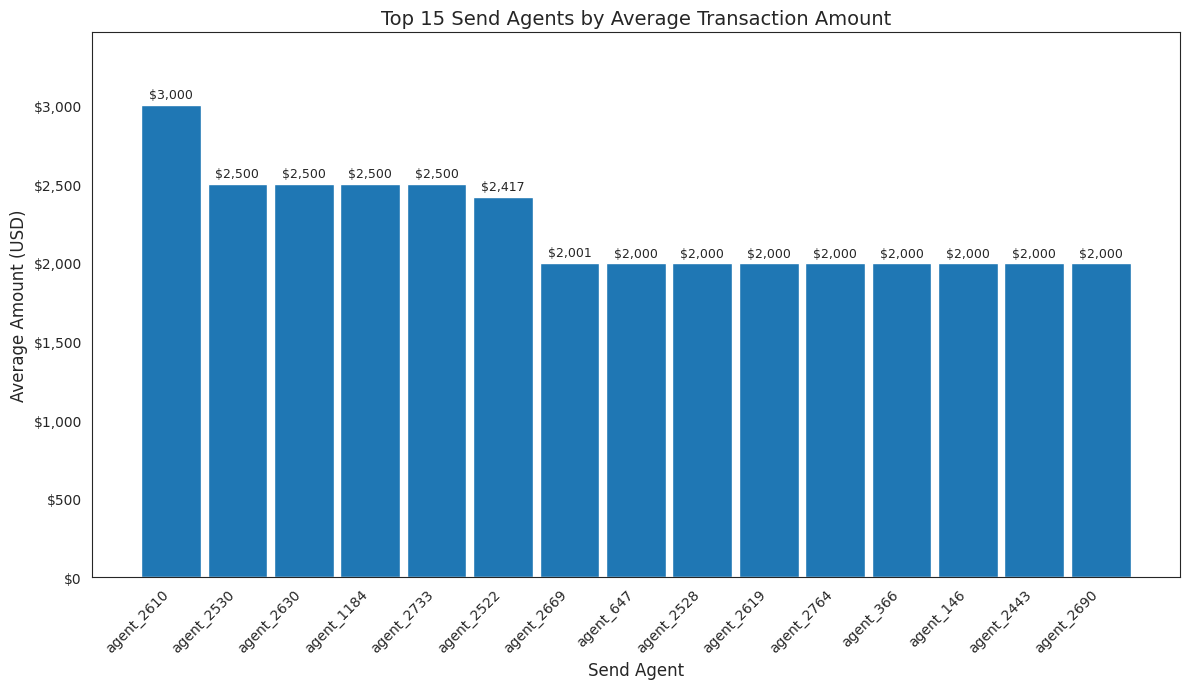

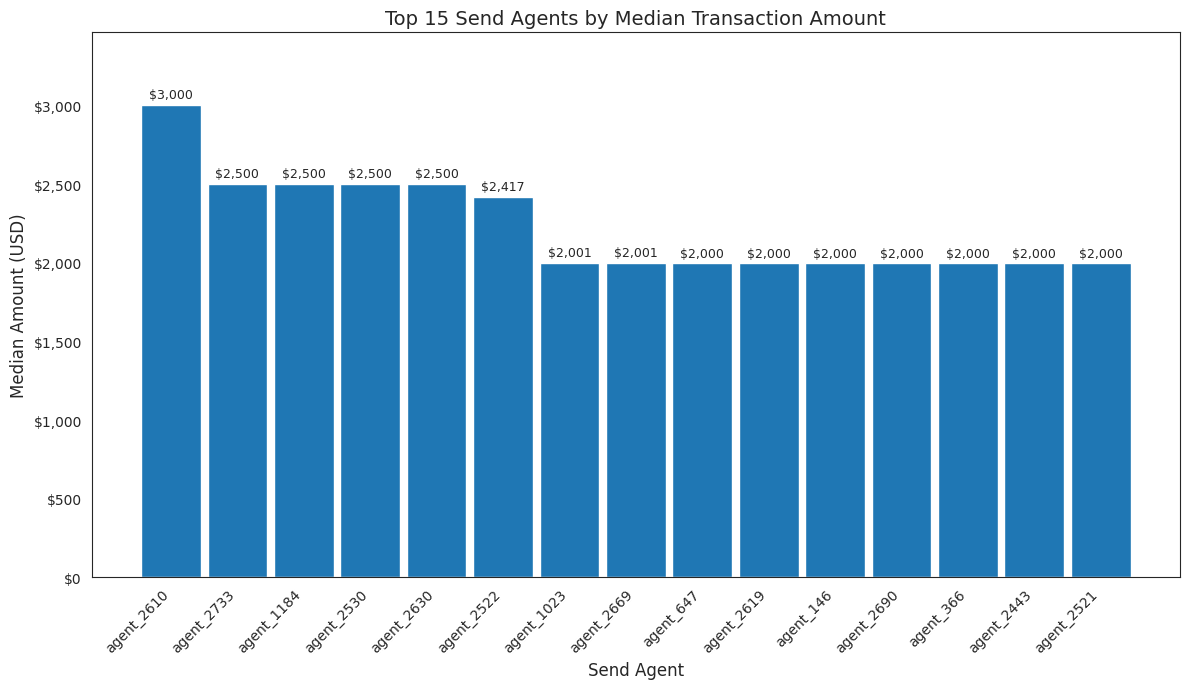

In [44]:
from matplotlib.ticker import FuncFormatter

# --- Aggregate average & median by Send Agent ---
send_stats = df.groupby("Send Agent Name_")["Amount"].agg(mean="mean", median="median")

# Top 15 by average
top_avg_send = (send_stats
                .sort_values("mean", ascending=False)
                .head(15)
                .reset_index()
                .rename(columns={"Send Agent Name_": "Send Agent", "mean": "Average Amount"}))

# Top 15 by median
top_med_send = (send_stats
                .sort_values("median", ascending=False)
                .head(15)
                .reset_index()
                .rename(columns={"Send Agent Name_": "Send Agent", "median": "Median Amount"}))

# Dollar formatter for y-axis
dollar_fmt = FuncFormatter(lambda x, pos: f'${x:,.0f}')

# ---------- Plot: Top 15 by AVERAGE ----------
fig, ax = viz.make_barplot(
    x="Send Agent",
    height="Average Amount",
    df=top_avg_send,
    rotation=45,
    title=("Top 15 Send Agents by Average Transaction Amount", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Average Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha('right')

# Add dollar labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()

# ---------- Plot: Top 15 by MEDIAN ----------
fig, ax = viz.make_barplot(
    x="Send Agent",
    height="Median Amount",
    df=top_med_send,
    rotation=45,
    title=("Top 15 Send Agents by Median Transaction Amount", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Median Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha('right')

# Add dollar labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()


## Final Recommendation

## Supporting Code

(Previously independently created code for personal projects I've led - see the projects section at https://philippe-heitzmann.com/ for more information)

In [23]:
# Your Viz class (keeping it unchanged)
class Viz():
    '''Class used to create a variety of visualizations such as barplots, lineplots, pairplots, heatmaps etc in an efficient manner'''
    
    def __init__(self, df = None, figsize = (10,6)):
        self.df = df
        if self.df is not None:
            self.df = df.copy(deep = True)
        self.figsize = figsize 
        print(f'Initiated with figsize {figsize}') 

    def check_df(self, df):
        '''Helper function to check if dataframe object is not None'''
        if df is not None: return df
        if self.df is not None: df = self.df 
        else: raise ValueError('Dataframe object needs to be passed during either object instantiation or method call')
        return df 

    def set_decorations(self, ax, **kwargs):
        '''Helper function setting figure decorations such as title, xlabel, ylabel, etc if provided as kwargs'''
        if 'title' in kwargs: ax.set_title(kwargs['title'][0], fontsize = kwargs['title'][1])
        if 'xlabel' in kwargs: ax.set_xlabel(kwargs['xlabel'][0], fontsize = kwargs['xlabel'][1])
        if 'ylabel' in kwargs: ax.set_ylabel(kwargs['ylabel'][0], fontsize = kwargs['ylabel'][1])
        if 'xlim' in kwargs: plt.xlim(kwargs['xlim'][0], kwargs['xlim'][1])
        if 'ylim' in kwargs: plt.ylim(kwargs['ylim'][0], kwargs['ylim'][1])     
        if 'legend' in kwargs: plt.legend(bbox_to_anchor = kwargs['legend'], loc = 'upper center')
        if 'xticklocs' in kwargs:
            ax.set_xticks(kwargs['xticklocs'])
            if 'xticklabels' in kwargs:
                ax.set_xticklabels(kwargs['xticklabels'])
        if 'rotation' in kwargs: plt.xticks(rotation = kwargs['rotation'])
        if 'vlines' in kwargs:
            for vline in kwargs['vlines']:
                plt.axvline(x = vline, linestyle = '--', color = 'red', linewidth = 1.5, alpha=0.7)
                # Add text annotation in data coordinates instead of using transform
                ylim = ax.get_ylim()
                plt.text(vline, ylim[1] * 0.9, f'${vline:,}', fontsize = 10, color = 'red', 
                        ha='center', va='bottom', rotation=90)
        if 'hlines' in kwargs:
            for hline in kwargs['hlines']:
                plt.axhline(y = hline, linestyle = '--', color = 'red', linewidth = 1.5, alpha=0.7)
                # Add text annotation in data coordinates instead of using transform
                xlim = ax.get_xlim()
                plt.text(xlim[1] * 0.05, hline, f'{hline}', fontsize = 10, color = 'red', 
                        ha='left', va='bottom')
        if 'points' in kwargs and 'col' in kwargs:
            for point in kwargs['points']:
                ax.plot(point, self.df.loc[self.df['TIME_DIM_NB2'] == point][[kwargs['col']]].iloc[0,0], 'or')
        plt.grid(False)
        return ax 
                             
    @staticmethod
    def get_xticks(df, col, n):
        return [x for x in range(0, len(df[col].unique()), n)]
                             
    def download_fig(self, **kwargs):
        if 'download' in kwargs and kwargs['download']:
            filename = 'plot' + '{:02d}'.format(datetime.now().month) + '{:02d}'.format(datetime.now().day) + '{:02d}'.format(datetime.now().hour) + '{:02d}'.format(datetime.now().minute) + '.png'
            plt.savefig(filename, bbox_inches = 'tight')
            print(f'Saved fig under filename {filename}')
                             
    def make_hist(self, *cols, df = None, num_bins = 50, **kwargs):
        '''Method for creating a histogram'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        for col in cols:
            # Filter out extreme outliers that might cause rendering issues
            data = df[col].dropna()
            q99 = data.quantile(0.99)
            q01 = data.quantile(0.01)
            filtered_data = data[(data >= q01) & (data <= q99)]
            
            # Ensure we have reasonable bin edges
            if len(filtered_data) > 0:
                n, bins, patches = ax.hist(filtered_data, bins = num_bins, alpha=0.7)
            else:
                print(f"Warning: No data to plot for column {col}")
        
        if len(cols) > 1:
            plt.gca().legend(cols)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        try:
            fig.tight_layout()
        except:
            print("Warning: Could not apply tight_layout, continuing without it")
        return fig, ax
                             
    def make_densityplot(self, *cols, df = None, **kwargs):
        '''Method for creating a density plot using seaborn kdeplot to visualize data in a manner analogous to a continuous probability distribution'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        for col in cols:
            sns.kdeplot(df[col], shade = True, label = 'Cyl=4', alpha = 0.5)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_boxplot(self, x = '', y = '', df = None, **kwargs):
        '''Method for creating a boxplot using seaborn function'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        sns.boxplot(x = x, y = y, data = df, notch = False)
        medians_dict = {str(grp[0]):grp[1][y].median() for grp in df.groupby(x)}
        xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
        n_obs = df.groupby(x)[y].size().values
        for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
            plt.text(x, medians_dict[xticklabel] * 1.05, '#obs: ' + str(n_ob), horizontalalignment = 'center', fontdict = {'size':8}, color = 'white')
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
    
    def make_pairplot(self, *cols, df = None, **kwargs):
        '''Method for creating a pairplot'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        sns.pairplot(df[list(cols)], kind = 'scatter', hue=group, plot_kw = dict(s=80, edgecolor = 'white', linewidth = 2.5))
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_divergingbars(self, x = '', y = '', df = None, linewidth = 5, **kwargs):
        '''Method for creating a diverging bars plot'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        df['colors'] = ['red' if val < 0 else 'green' for val in df[x]]
        plt.hlines(y = df[y], xmin = 0, xmax = df[x], color = df.colors, alpha = 0.4, linewidth = linewidth)
        plt.grid(linestyle='--', alpha = 0.5)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_scatter(self, *cols, x = 'TIME_DIM', y = '', group = None, df = None, timeseries = False, bestfit = False, linewidth = 3, c = None, **kwargs):
        '''Method for creating a simple scatterplot with boolean flag bestfit option to create a best fit line through data'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        if timeseries:
            #updating formatting of xtick labels in case our xaxis xticklabels are in date format for legibility purposes
            xtick_locations = df.index.to_list()[::12]
            xtick_labels = [x[:4] for x in df[x].tolist()[::12]]
            plt.xticks(ticks=xtick_locations, labels = xtick_labels, rotation = 0, fontsize = 12, horizontalalignment = 'center', alpha = 0.7)
            plt.yticks(fontsize=12, alpha = 0.7)
        elif bestfit:
            sns.lmplot(x=x, y=y, hue=group, data=df, height=self.figsize[0], aspect=1.6, robust = True, palette = 'tab10', scatter_kws=dict(s=60, linewidths=0.7, edgecolors = 'black'))
            return
        elif 'lineplot' in kwargs:
            for col in cols:
                plt.plot(df[x], df[col], linewidth = linewidth, **kwargs)
        else:
            plt.scatter(df[cols[0]], df[cols[1]], c = c)
        plt.grid(axis = 'both', alpha = 0.3)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_marginalhist(self, dfs, x, y, xg, yg, group = '', multi = True, df = None, **kwargs):
        '''Method for creating a marginal histogram showing both distributions and interactions of two numerical variables side by side'''
        df = self.check_df(df)
        fig = plt.figure(figsize = (self.figsize[0], self.figsize[0]))
        if multi:
            df = dfs[0]
            dfg = dfs[1]
        else:
            df = dfs[0]
            dfg = dfs[0]
        grid = plt.GridSpec(4,4, hspace = 0.5, wspace = 0.2)
        ax_main = fig.add_subplot(grid[:-1, :-1])
        ax_right = fig.add_subplot(grid[:-1, -1])
        ax_bottom = fig.add_subplot(grid[-1, :-1])
        ax_main.scatter(xg, yg, s=self.figsize[0] * 3, c = group, alpha = 0.9, data = dfg, cmap = 'tab10', edgecolors = 'gray', linewidths = 0.5)
        #bottom histogram
        ax_bottom.hist(df[x], 40, orientation = 'vertical', color = 'deeppink')
        ax_bottom.invert_yaxis()
        #right histogram
        ax_right.hist(df[y], 40, orientation = 'horizontal', color = 'deeppink')
        ylabel = 'average ' + y 
        ax_main = self.set_decorations(ax_main, title = f'Plot of {x} vs {y}', xlabel = x, ylabel = ylabel, **kwargs)                             
        plt.xticks(rotation = 45)
        self.download_fig(**kwargs)
        fig = ax_main.get_figure()
        fig.tight_layout()
        return fig, ax_main
    
    def make_catplot(self, x = '', y = '', group = '', df = None, **kwargs):
        '''Method for creating categorical plots'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        g = sns.catplot(x = x, y = y, col = group, data = df, saturation = 0.5, kind = 'bar', ci=None, aspect = 0.5)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
                             
    def make_barplot(self, x = '', height = '', df = None, barwidth = 0.9, ylim_scalefactor = 1.1, hline = False, vline = False, barh = False, label_adj = 1, annots = False, **kwargs):
        '''Method for creating a barplot'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        if barh:
            y_pos = np.arange(len(list(df[height])))
            ax.bar(x = y_pos, height = height, align = 'center', width = barwidth)
            rects = ax.patches
            ax.set_yticks(y_pos)
            ax.invert_yaxis()
            if vline:
                mean = df[height].mean()
                ax.axvline(mean, color = 'black', linewidth = 2, linestyle = 'dashed', label = 'mean: {:.1f}'.format(mean))
                plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
        else:
            ax.bar(list(df[x]), height = df[height], align = 'center', width = barwidth) 
            rects = ax.patches
            ymin, ymax = plt.ylim()
            plt.ylim(ymin, ymax * ylim_scalefactor)
            if annots:
                labels = [np.round(yval, 2) for yval in list(df[height])]
                for rect, label in zip(rects, labels):
                    rectheight = rect.get_height()
                    ax.text(rect.get_x() + rect.get_width() / 2, rectheight + label_adj, label, ha = 'center', va = 'bottom')
                    if hline: 
                        mean = df[height].mean()
                        ax.axhline(mean, color = 'black', linewidth = 2, linestyle = 'dashed', label = 'mean: {:.1f}'.format(mean))
                        plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')       
        ax.set_facecolor('xkcd:white')
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
    
    def make_grouped_barplot(self, *cols, groups = '', df = None, **kwargs):
        '''Method for creating a grouped barplot'''
        df = self.check_df(df)
        x = np.arange(len(groups))
        width = 0.35
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        for col in cols:
            ax.bar(x - width/2, df[col], width, label='test')
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                         
    def make_corrheatmap(self, df = None, color = 'Blues', ticks_fontsize = 14, text_fontsize = 14, **kwargs):
        '''Method for creating a correlation heatmap
        Inputs: df should be prepreprocessed using df.corr() for instance'''
        df = self.check_df(df)
        
        # Limit the size of the heatmap to prevent memory issues
        max_size = 50  # Maximum number of rows/columns to display
        if df.shape[0] > max_size or df.shape[1] > max_size:
            print(f"Warning: Heatmap too large ({df.shape}). Showing top {max_size}x{max_size} subset.")
            df = df.iloc[:max_size, :max_size]
        
        # Adjust figure size based on matrix size
        fig_width
    
    def get_subplots(self, *series, nplots = 2, returnfig = False, **kwargs):
        fig, ax = plt.subplots(nplots, figsize = self.figsize)
        for i in range(nplots):
            ax[i].plot(series[i])
            ax[i] = self.set_decorations(ax[i], **kwargs)
            if 'titles' in kwargs:
                ax[i].set_title(kwargs['titles'][i])
            if 'xlabels' in kwargs:
                ax[i].set_xlabel(kwargs['xlabels'][i])
        self.download_fig(**kwargs)
        if returnfig: return fig
    
    def make_choropleth(self, df = None, state_col = '', values_col = '', title = '', **kwargs):
        '''Method for creating a choropleth'''
        df = self.check_df(df)
        data = [dict(type = 'choropleth', autocolorscale = False, locations = df[state_col], z = df[values_col], locationmode = 'USA=states', marker = dict(line=dict(color = 'rgb(255,255,255)', width = 2)),colorbar = dict(title=title))]
        layout = dict(title = title, geo = dict(scope = 'usa', projection = dict(type='albers usa'), lakecolor = 'rgb(255,255,255)'))
        fig = dict(data = data, layout = layout)
        self.download_fig(**kwargs)
        return pyo.iplot(fig, filename = 'choropleth-map')


In [ ]:
Link to chatgpt conversation:
https://chatgpt.com/share/68d11875-b56c-800f-8657-5880d999497d

## Appendix

# **Selected column definitions**

- **Sender ID1 Info** - whether a sender indicated his or her ID (binary). In a real anti-money laundering (AML) analysis, this would be an ID number (e.g. a driver's license).
- **Payee ID1 Info** - whether a payee (receiver) indicated his or her ID (binary). In a real anti-money laundering (AML) analysis, this would be an ID number (e.g. a driver's license).
- **Sender Name** - the name of the sender
- **Payee Name** -  the name of the payee (receiver)
- **Send Agent Name** - the physical location or business address where the sender wires money. Frequently, AML cases are initiated because of suspicious transactions being made out of specific stores (or send agents)
- **Send Operator Name -**  the sender's wire transfer operator (such as Western Union)
- **Pay Agent Name -** the physical location or business address where the receiver (payee) receives the money
- **Pay Operator Name** - the receiver's wire transfer operator (again, such as Western Union)

In [ ]:
## 